Array shape
(185, 272, 3)

Dimensions of the Image
Height : 185
Width : 272

Cluster centroids
[[251.61451098 247.8816103  243.42645642]
 [ 29.61492244  21.66517369  20.54522613]
 [210.93937668 175.29131744 144.26828871]]
Elements of Each cluster 
{0: 19734, 1: 18304, 2: 12282}
   col1  col2  col3  cluster
0   240   240   240        0
1   255   255   255        0
2   255   255   255        0
3   251   251   251        0
4   255   255   255        0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


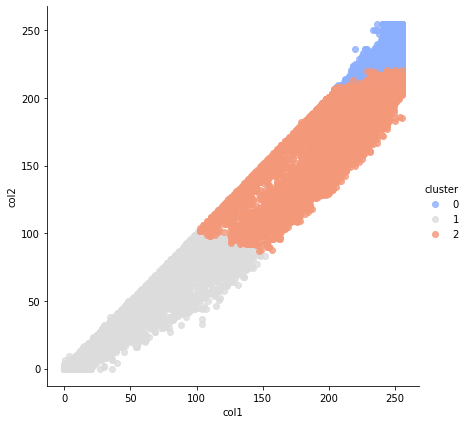

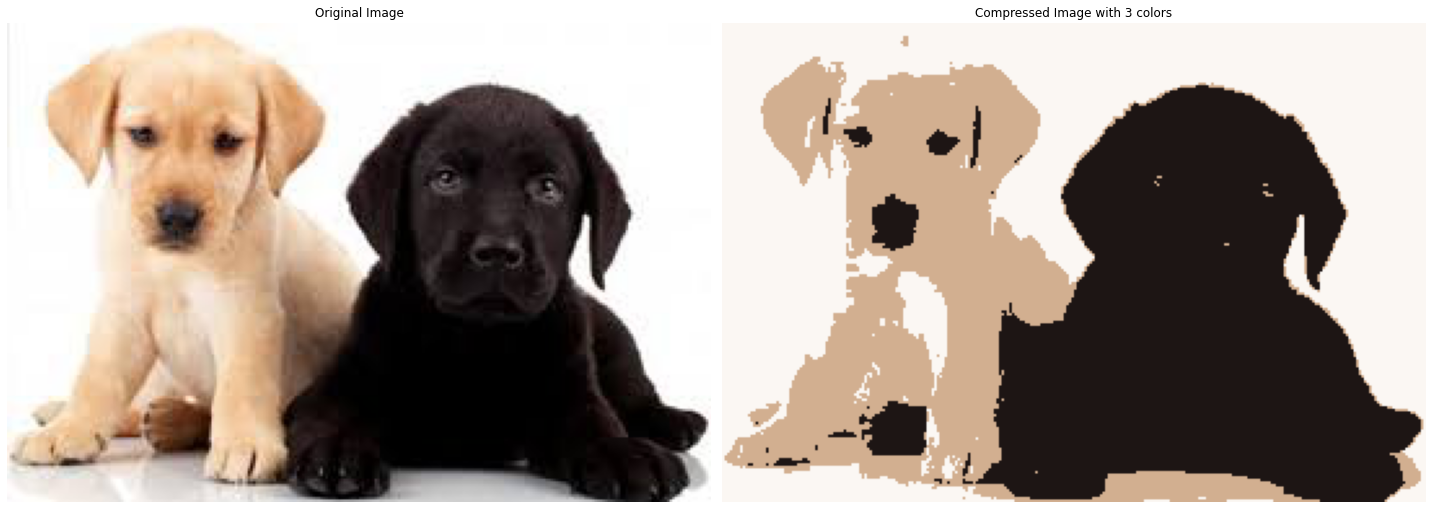

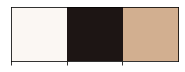

In [1]:
# https://imaddabbura.github.io/post/kmeans_clustering/

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from PIL import Image

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

# Convert PIL image to array
img = Image.open("dogs.jpeg")
np_array = np.array(img)

print("Array shape")
print(np_array.shape)

print("\nDimensions of the Image")
print("Height : " + str(img.height))
print("Width : " + str(img.width))

# Reshape the array in 2 dimensions
flat_array = np_array.ravel()
new_array = flat_array.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])


# Initializing the k means
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

print("\nCluster centroids")
print(kmeans.cluster_centers_)


# count elements of each cluster
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())

# Plot cluster points
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False)


X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    np_array.shape[0], np_array.shape[1], np_array.shape[2])


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()


# Find Dominant color 
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()